In [30]:
import numpy as np
import matplotlib.pyplot as plt


def standarize(x):
    x_mean=x.mean()#平均
    std=x.std() #標準偏差
    return (x-x_mean)/std#標準化

def create_matrix(x_std):# tX*w
    return np.vstack([np.ones(x_std.size),
    x_std,
    x_std**2
    ]).T #.Tが転置

def matrix_f(matrix_x,parameter):#a1*b1+12*b2+a3*b3
    return np.dot(matrix_x,parameter)#numpy.dotは内積（一次）、行列積（多次元）

def matrix_E(matrix_x,y,parameter):#parameterはw0,w1,w2
    return 0.5*np.sum((y-matrix_f(matrix_x,parameter))**2)

def polynomial_regression(matrix_x,y):
    parameter=np.random.randint(0,50,3)
    LNR=1e-3#学習率
    defference=1
    count=1#更新回数
    err_before=matrix_E(matrix_x,y,parameter)
    log="({}) parameter:{} error :{:.4f}"
    while defference>1e-2:
        #w0,w1,w2を更新する
        parameter=parameter-LNR*np.dot(matrix_f(matrix_x,parameter)-y,matrix_x)
        err_after=matrix_E(matrix_x,y,parameter)
        defference=err_before-err_after
        err_before=err_after
        if count==1 or count%100==0:
            print(log.format(count,parameter,defference))
        count+=1
    print(log.format(count,parameter,defference))
    return parameter




In [31]:
data=np.loadtxt("sales.csv",dtype="int",delimiter=",",skiprows=1)
x=data[:,0]
y=data[:,1]
x_std=standarize(x)
matrix_x=create_matrix(x_std)
parameter=polynomial_regression(matrix_x,y)


(1) parameter:[53.441      32.04339184 64.75432279] error :1204141.1669
(100) parameter:[847.93454692 263.52080657 280.36648627] error :14129.3923
(200) parameter:[1063.50378391  286.99225623  160.29049495] error :2433.0359
(300) parameter:[1154.22925645  285.51817233  108.24362331] error :440.9610
(400) parameter:[1192.84570773  283.3602478    86.02193029] error :80.3200
(500) parameter:[1209.31617909  282.23628328   76.53543365] error :14.6372
(600) parameter:[1216.34547265  281.72957288   72.48562851] error :2.6675
(700) parameter:[1219.34602943  281.50969134   70.7567583 ] error :0.4861
(800) parameter:[1220.62693844  281.41535055   70.01870002] error :0.0886
(900) parameter:[1221.17375652  281.37501356   69.70362141] error :0.0161
(930) parameter:[1221.26285513  281.36843834   69.65228234] error :0.0099


<function matplotlib.pyplot.show(*args, **kw)>

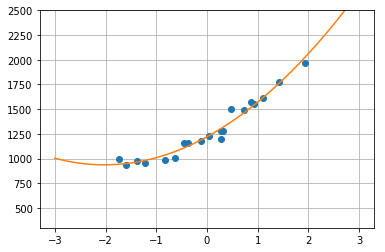

In [33]:
x_axis=np.linspace(start=-3,stop=3,num=100)
plt.ylim(300,2500)
plt.plot(x_std,y,'o')
plt.plot(x_axis,matrix_f(create_matrix(x_axis),parameter))
plt.grid(True)
plt.show